In [1]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [2]:
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

Hello world
I'm evolving!!!



In [3]:
# local dos dados e modifica o diretorio
path='/home/ucfilho/Documents/Aulas/Ago_29_2018'
os.chdir(path)

In [4]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

# normatize funcion
def Normatiza(x):
    strings=list(x)
    for featur in strings:
        max_feat=x[featur].max()
        min_feat=x[featur].min()
        x[featur]=(x[featur]-min_feat)/(max_feat-min_feat)
    return x

# normatize funcion
def Original(x,x_old):
    strings=list(x)
    x_old.columns = list(x)
    for featur in strings:
        max_feat=x_old[featur].max()
        min_feat=x_old[featur].min()
        x[featur]=x[featur]*(max_feat-min_feat)+min_feat
    return x


In [5]:

# leitura dos dados
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")

# separa as colunas de interesse
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
Y_old=Dat_Select['Resistence'].copy()
#print(Dat_Select.head())

# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
#print(DAT.head())

# separa os dados em treino e teste
train=[]
test=[]
train=DAT.sample(frac=0.8,random_state=None).copy() # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index).copy()
X_train=train.loc[DAT['Hydrofoil']==DAT['Hydrofoil'],['Hydrofoil','Froude']].values
X_test=test.loc[DAT['Hydrofoil']==DAT['Hydrofoil'],['Hydrofoil','Froude']].values
Y_test=train.loc[DAT['Hydrofoil']==DAT['Hydrofoil'],['Resistence']].values
Y_train=train.loc[DAT['Hydrofoil']==DAT['Hydrofoil'],['Resistence']].values



In [6]:
# Parametros da rede neural
Neuron_input=2
Neuron_hidden=20
Neuron_output=1
Learning_rate=0.01
omega=0.9
Epoch=50000  

Epoch 0 error:0.37437735103
Epoch 5000 error:0.0357284192495
Epoch 10000 error:0.0356057624857
Epoch 15000 error:0.0355162031035
Epoch 20000 error:0.0354389232321
Epoch 25000 error:0.0353738369576
Epoch 30000 error:0.035341954863
Epoch 35000 error:0.0352951539409
Epoch 40000 error:0.0352342242176
Epoch 45000 error:0.0351689517013


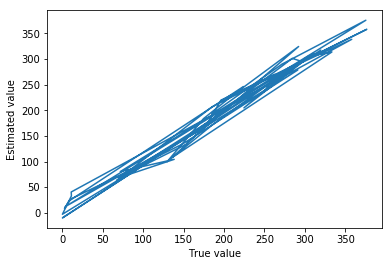

In [7]:
# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1
syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1

for j in range(Epoch):

    # Feed forward through layers 0, 1, and 2
    l0 = X_train
    l1 = sigmoid(np.dot(l0,syn0))
    l2 = purelin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = Y_train - l2

    if (j% 5000) == 0:
        print("Epoch %d"%(j) +" error:" + str(np.mean(np.abs(l2_error))))

    l2_delta = l2_error*purelin(l2,deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * sigmoid(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)*Learning_rate
    syn0 += l0.T.dot(l1_delta)*Learning_rate

Y_test=pd.DataFrame(Y_test)
Y_test.columns = ["y_test"]
y_calc=np.reshape(l2,len(l2))
y_calc=pd.DataFrame({'y_calc':y_calc})
y_old=pd.DataFrame({'y_old':Y_old})
y_calc=Original(y_calc,y_old)
y_obs=Original(Y_test,y_old)

#plt.scatter(y_obs,y_calc, s=10, c='b', marker="s")
plt.plot(y_obs,y_calc)
plt.xlabel("True value")
plt.ylabel("Estimated value")
plt.show()

In [8]:
mse=mean_squared_error(y_obs,y_calc)
print("MSE teste=",mse)
R2=r2_score(y_obs,y_calc)
print("R^2 teste=",R2)

MSE teste= 261.082084595
R^2 teste= 0.978828655384
